## Kaggle dataset related code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv


## Read the dataset

In [3]:
pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0           1860.0
1           6628.0
2           1536.0
3             27.0
4            390.0
            ...   
1059904       27.0
1059905      772.0
1059906    15806.0
1059907     5974.0
1059908      119.0
Name: user_followers_count, Length: 1059909, dtype: object

## Extract the required field

In [21]:
followers_count = np.asarray(pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv")['user_followers_count'])
print(len(followers_count))

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1059909


## Extract the first digits and store

In [47]:
benford_map = [0,0,0,0,0,0,0,0,0,0]
excpt = 0
for digits in followers_count:
    try:
        
        digits = float(digits)
        digits = int(digits)
        str_digits = str(digits)
        msd = int(str_digits[0])
        benford_map[msd] = benford_map[msd] + 1
        
    except:
        excpt = excpt + 1
    
print('skipped:' ,excpt)
print(benford_map)


skipped: 283130
[11215, 235013, 138760, 96024, 73730, 59971, 48387, 42502, 38533, 32644]


## Plot the graph

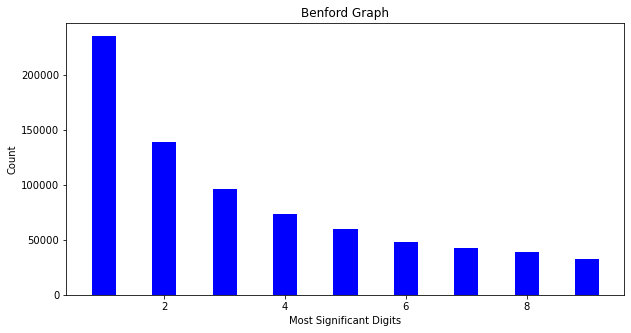

In [52]:
import matplotlib.pyplot as plt  
fig = plt.figure(figsize = (10, 5)) 
x = [0,1,2,3,4,5,6,7,8,9]
# creating the bar plot 
plt.bar(x[1:], benford_map[1:], color ='blue',  
        width = 0.4) 
plt.xlabel("Most Significant Digits") 
plt.ylabel("Count") 
plt.title("Benford Graph") 
plt.show() 

## calculate percentage

In [53]:
ben_map = benford_map[1:]
total = 0
for entry in ben_map:
    total = total + entry


i = 1
output = {}  
for entry in ben_map:
    output[str(i)] = str((entry/total)*100)
    i = i+1
    
print(output)


{'1': '30.698021328066627', '2': '18.12519919954439', '3': '12.542909541200997', '4': '9.63080813622375', '5': '7.833571066560078', '6': '6.320438265122184', '7': '5.551723957761859', '8': '5.033282651744335', '9': '4.264045853775778'}


# Satisfied